# Guided Project: Predicting Car Prices

In this guided project, we practice using the k-nearest neighbors algorithm to predict car prices. The data is from the UCI Machine Learning Repository and is available [here](https://archive.ics.uci.edu/ml/datasets/automobile).

## Reading in the Data

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = None

In [115]:
cars = pd.read_csv('Datasets\imports-85.data', header=None)

In [116]:
cars.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


## Exploring the Data

In [117]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [118]:
cars.shape

(205, 26)

In [119]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Cleaning the Data

In [120]:
cars = cars.replace('?', np.nan)

In [121]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [122]:
cars[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']] = cars[['bore', 'stroke', 'horsepower', 'peak-rpm', 'price']].astype(float)

In [123]:
cars.columns = cars.columns.str.replace('-','_')

In [124]:
cars['normalized_losses'].isnull().value_counts()

False    164
True      41
Name: normalized_losses, dtype: int64

Here, we see that the 'normalized_losses' column has 41 missing values, which is around a 5th of the data. However, all other columns only have at most 3 or 4 missing values. Consequently, we will drop the 'normalized_losses' column as using it would force us to lose a considerable amount of the data (or make assumptions to infer values for the missing data). 

In [125]:
cars.drop('normalized_losses',axis=1, inplace=True)

In [126]:
cars.dropna(inplace=True)

In [127]:
cars.shape

(193, 25)

After dropping the 'normalized_losses' column and removing any other rows with null values, we have 193 rows remaining in the dataset. This is around 94% of the original data containing 205 rows. 

In [128]:
col_normalize = ['wheel_base', 'length', 'width', 'height', 'curb_weight','engine_size',
 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg']
col_numeric = ['wheel_base', 'length', 'width', 'height', 'curb_weight','engine_size',
 'bore', 'stroke', 'compression_rate', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [129]:
for col in col_normalize:
    cars[col] = (cars[col] - min(cars[col]))/(max(cars[col]) - min(cars[col]))

In [149]:
cars_numeric = cars[col_numeric].copy()
cars_numeric = cars_numeric.reset_index()

In [150]:
cars_numeric.head()

,index,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,0,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,1,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,2,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,3,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,4,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Analyzing the Data

In [262]:
def knn_train_test(tr_col, tar_col, df): #creating a simple k-neighbors train-and-test function
    new_ind = np.random.RandomState(seed=1).permutation(193)
    df = df.loc[new_ind]
    train = df.head(97)
    test = df.tail(96)
    knn = KNeighborsRegressor()
    knn.fit(train[[tr_col]], train[tar_col])
    predictions = knn.predict(test[[tr_col]])
    rmse = mean_squared_error(test[tar_col], predictions)**.5
    return rmse

In [263]:
rmse_results = {}
for col in col_normalize:
    rmse_results[col] = knn_train_test(col, 'price', cars_numeric)

In [264]:
rmse_results = pd.Series(rmse_results)
rmse_results.sort_values()

engine_size         3266.103230
curb_weight         4296.837719
highway_mpg         4448.697594
city_mpg            4481.309043
width               4571.411639
horsepower          4896.075705
length              5863.097912
wheel_base          5902.382125
compression_rate    6382.342011
bore                7268.169907
stroke              8035.714548
peak_rpm            8206.051051
height              8435.962899
dtype: float64

In [204]:
def knn_train_test_k(tr_col, tar_col, df): #allowing k to vary in the k-neighbors train-and-test function
    new_ind = np.random.RandomState(seed=1).permutation(193)
    df = df.loc[new_ind]
    train = df.head(97)
    test = df.tail(96)
    k_vals = [1,3,5,7,9]
    rmse_list = []
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[[tr_col]], train[tar_col])
        predictions = knn.predict(test[[tr_col]])
        rmse = mean_squared_error(test[tar_col], predictions)**.5
        rmse_list.append(rmse)
    return rmse_list

In [205]:
rmse_k_results = {}
for col in col_normalize:
    rmse_k_results[col] = knn_train_test_k(col, 'price', cars_numeric)

In [214]:
rmse_k_results = pd.DataFrame(rmse_k_results)
rmse_k_results

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_rate,horsepower,peak_rpm,city_mpg,highway_mpg
0,5539.328175,6225.715700,4949.925840,11049.628949,4983.167716,2991.085977,11994.046481,8227.238007,7098.361486,4626.814172,7201.339859,5495.228488,4802.419555
1,5689.657078,5819.555982,4404.320202,8682.467183,4135.084348,2976.826478,8056.004752,7437.611349,6513.154339,4478.815675,7701.492527,4244.355793,4238.901352
2,5902.382125,5863.097912,4571.411639,8435.962899,4296.837719,3266.103230,7268.169907,8035.714548,6382.342011,4896.075705,8206.051051,4481.309043,4448.697594
3,5904.289464,5884.472055,4447.115400,8213.935620,4372.359097,3646.700423,7036.333545,8604.224013,6566.790905,5314.010004,7870.897143,4297.772475,4575.175774
4,6057.382214,5924.759729,4727.969457,8252.762618,4798.026940,3940.704408,7189.866119,8201.177422,6839.130538,5185.162712,7874.665648,4685.707661,4853.688898


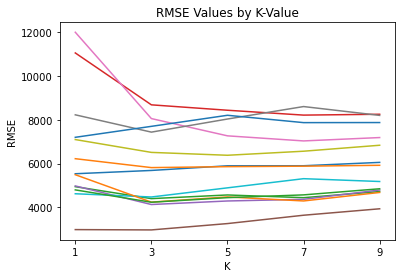

In [223]:
for c in rmse_k_results.columns:
    plt.plot([1,3,5,7,9], rmse_k_results[c])
plt.xticks([1,3,5,7,9])
plt.title('RMSE Values by K-Value')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

Above, we see that the best k-value varies depending on what column we use to train the algorithm. However, it seems that 3 or 5 are the best values for most columns. 

In [248]:
def knn_train_test_cols(tr_cols, tar_col, df): #modifying the k-neighbors train-and-test function to accept multiple training columns.
    new_ind = np.random.RandomState(seed=1).permutation(193)
    df = df.loc[new_ind]
    train = df.head(97)
    test = df.tail(96)
    knn = KNeighborsRegressor()
    knn.fit(train[tr_cols], train[tar_col])
    predictions = knn.predict(test[tr_cols])
    rmse = mean_squared_error(test[tar_col], predictions)**.5
    return rmse

In [249]:
rmse_results = rmse_results.sort_values()
cols = list(rmse_results.index[:2])
cols

['engine_size', 'curb_weight']

In [257]:
multi_cols_rmse = {}
for i in range(2,6): 
    cols = list(rmse_results.index[:i])
    rmse = knn_train_test_cols(cols, 'price', cars_numeric)
    multi_cols_rmse[i] = rmse

In [265]:
multi_cols_rmse #the RMSE values using the top 2, 3, 4, and 5 columns with the lowest RMSE from the single column analysis. 

{2: 3395.090700064826,
 3: 3646.4103008415464,
 4: 3939.500331577597,
 5: 3658.9598791869803}

Above, we see that when multiple columns are used to train the algorithm, the lowest rmse with the default k-value (5) is found using just the top two categories from the single column analysis. 

In [273]:
def knn_train_test_25k(tr_cols, tar_col, df): #allowing k to vary in the k-neighbors train-and-test function
    new_ind = np.random.RandomState(seed=1).permutation(193)
    df = df.loc[new_ind]
    train = df.head(97)
    test = df.tail(96)
    k_vals = [x for x in range(1,26)]
    rmse_list = []
    for k in k_vals:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train[tr_cols], train[tar_col])
        predictions = knn.predict(test[tr_cols])
        rmse = mean_squared_error(test[tar_col], predictions)**.5
        rmse_list.append(rmse)
    return rmse_list

In [282]:
top_col_groups = [['engine_size','curb_weight'],
                  ['engine_size','curb_weight','highway_mpg'],
                  ['engine_size','curb_weight','highway_mpg','city_mpg','width']]
rmse_vals_25 = {}
for i, cols in zip([2,3,5],top_col_groups):
    rmse_list = knn_train_test_25k(cols, 'price', cars_numeric)
    rmse_vals_25[i] = rmse_list

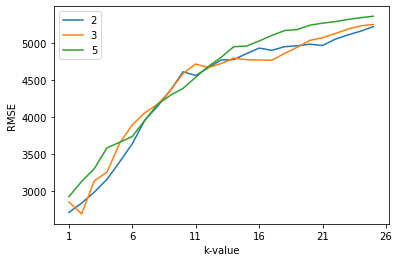

In [299]:
rmse_vals_25 = pd.DataFrame(rmse_vals_25)
rmse_vals_25.index = [x for x in range(1,26)]

for c in [2,3,5]:
    plt.plot([x for x in range(1,26)], rmse_vals_25[c], label=c)
    plt.legend()
plt.xticks([x for x in range(1,27,5)])
plt.xlabel('k-value')
plt.ylabel('RMSE')
plt.show()

Above, we can see that the best k-values for the models with 2, 3, and 5 columns are all quite low (either 1 or 2). 